In [79]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

In [80]:
import pickle

file_path = "/home/cl/Dropbox/Codes/python/current/200501NIOS.pkl"
with open(file_path, 'rb') as f:
    data = pickle.load(f)

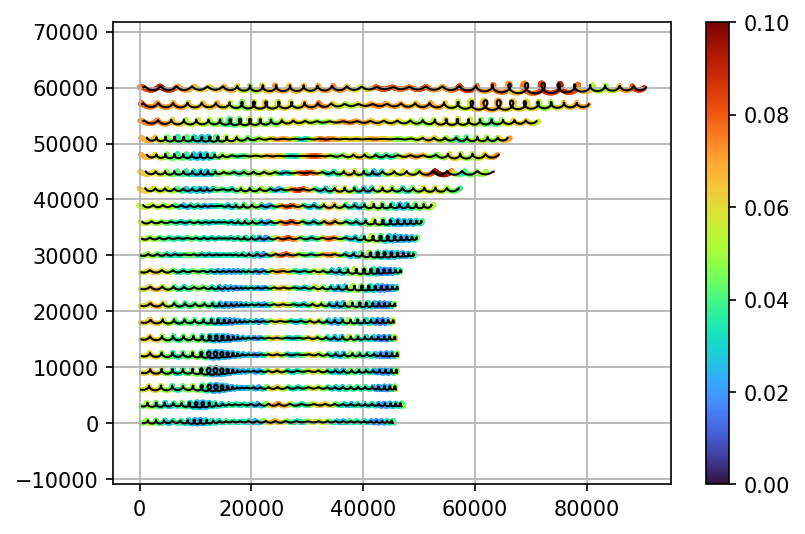

In [81]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150
plt.figure(figsize=(6,4))
speed = np.sqrt(data['niosres'].real**2 + data['niosres'].imag**2)
for i in range(0, 21):
    plt.scatter(np.cumsum(data['cvo_NIOSnegDATA'][:,i].real) + savgol_filter(np.cumsum(speed[:,i]),24*10,2),np.cumsum(data['cvo_NIOSnegDATA'][:,i].imag)+3000*i, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(np.cumsum(data['cvo_NIOSnegDATA'][:,i].real) + savgol_filter(np.cumsum(speed[:,i]),24*20,2),np.cumsum(data['cvo_NIOSnegDATA'][:,i].imag)+3000*i, linewidth = 1, color = 'k')

plt.colorbar()
plt.axis('equal')
plt.grid()

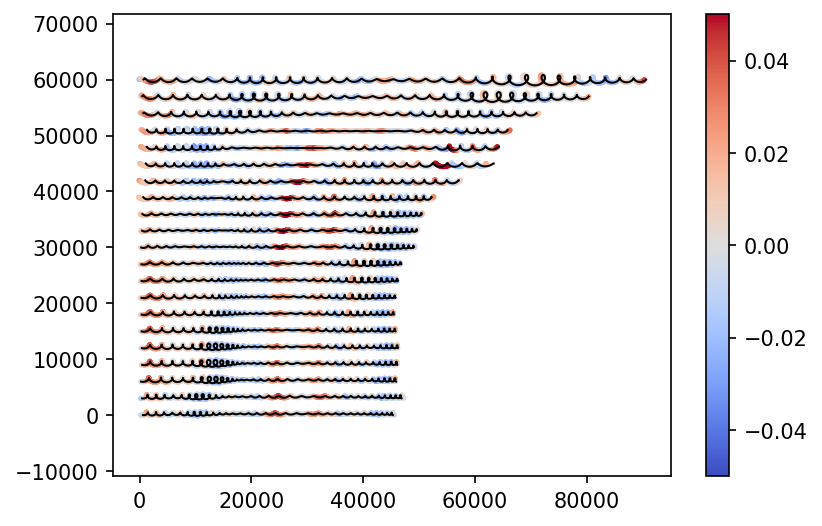

In [82]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150
plt.figure(figsize=(6,4))
speed = np.sqrt(data['niosres'].real**2 + data['niosres'].imag**2)
for i in range(0, 21):
    plt.scatter(np.cumsum(data['cvo_NIOSnegDATA'][:,i].real) + savgol_filter(np.cumsum(speed[:,i]),24*10,2),np.cumsum(data['cvo_NIOSnegDATA'][:,i].imag)+3000*i, c = savgol_filter((speed[:,i]-np.nanmean(speed[:,i]))/1000,24*2,2), cmap='coolwarm', s=2, vmin = -0.05, vmax = 0.05)
    plt.plot(np.cumsum(data['cvo_NIOSnegDATA'][:,i].real) + savgol_filter(np.cumsum(speed[:,i]),24*20,2),np.cumsum(data['cvo_NIOSnegDATA'][:,i].imag)+3000*i, linewidth = 1, color = 'k')

plt.axis('equal')
plt.grid()
plt.colorbar()
plt.axis('equal')
plt.grid()

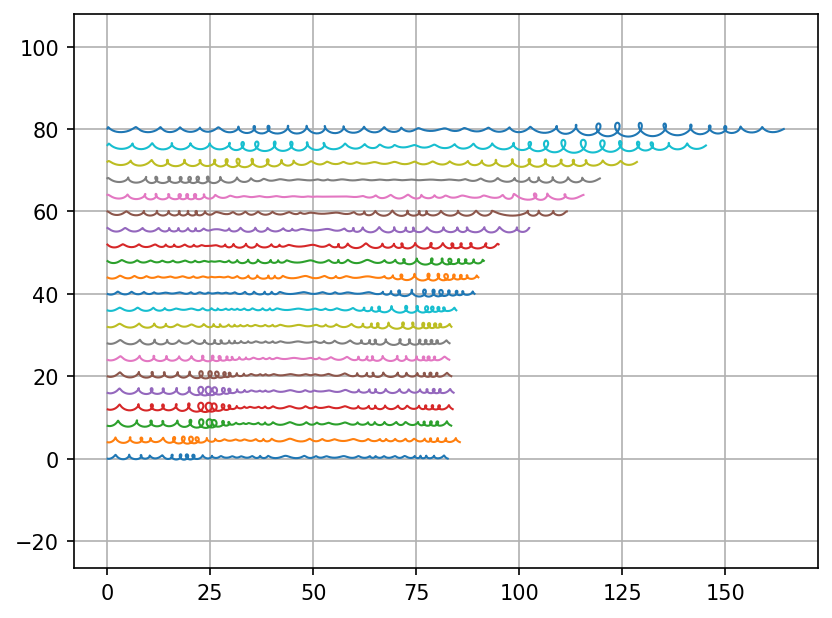

In [83]:
speed = np.sqrt(data['niosres'].real**2 + data['niosres'].imag**2)

for i in range(0,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + savgol_filter(speed[:,i]/1000,24*2,2)) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    plt.plot(x_traj,y_traj+4*i, linewidth = 1)

plt.axis('equal')
plt.grid()

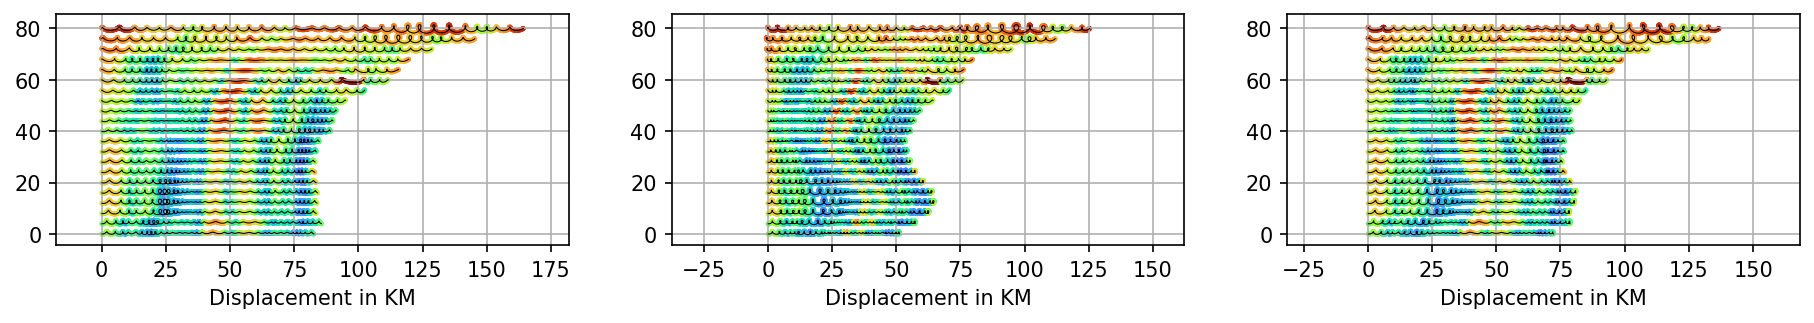

In [9]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150

plt.figure(figsize=(15,2))
plt.subplot(1,3,1)

speed = np.sqrt(data['niosres'].real**2 + data['niosres'].imag**2)
for i in range(0,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + savgol_filter(speed[:,i]/1000,24*2,2)) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    plt.scatter(x_traj,y_traj+4*i, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4*i, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.grid()

plt.subplot(1,3,2)

speed = np.sqrt(data['niosres'].real**2 + data['niosres'].imag**2)
for i in range(0,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + savgol_filter(np.abs(data['u_baroclinic'][:,i])/1000,24*2,2)) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    plt.scatter(x_traj,y_traj+4*i, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4*i, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.grid()



plt.subplot(1,3,3)

speed = np.sqrt(data['niosres'].real**2 + data['niosres'].imag**2)
for i in range(0,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + savgol_filter(np.abs(data['v_baroclinic'][:,i])/1000,24*2,2)) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    plt.scatter(x_traj,y_traj+4*i, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4*i, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.grid()

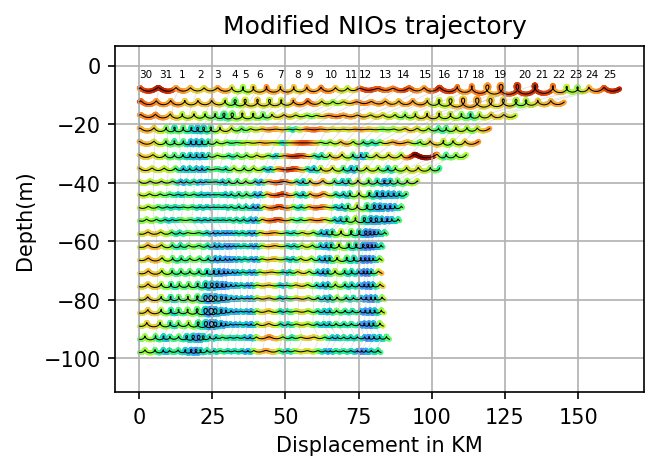

In [10]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150

xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)

speed = np.sqrt(data['niosres'].real**2 + data['niosres'].imag**2)
for i in range(0,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('Modified NIOs trajectory ')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)
    

In [11]:
data['time']['day'].values[1]

np.uint8(30)

In [12]:
yz[800,20]

np.float64(-8.615828263950604)

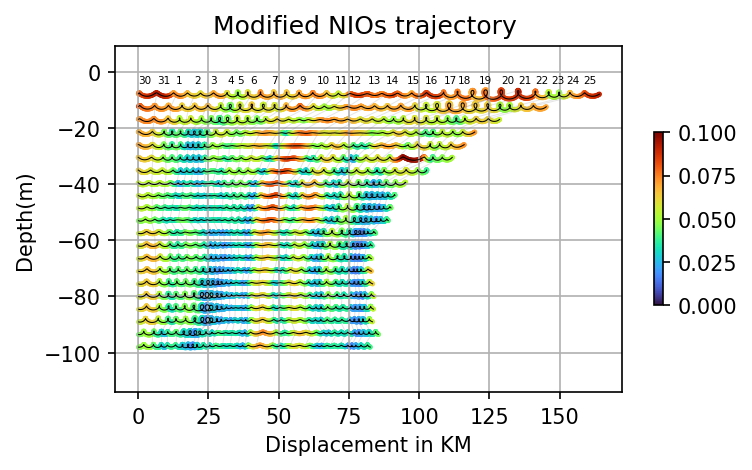

In [13]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150

xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)

speed = np.sqrt(data['niosres'].real**2 + data['niosres'].imag**2)
for i in range(0,20):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

for i in range(20,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.colorbar(shrink = 0.5)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('Modified NIOs trajectory ')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)

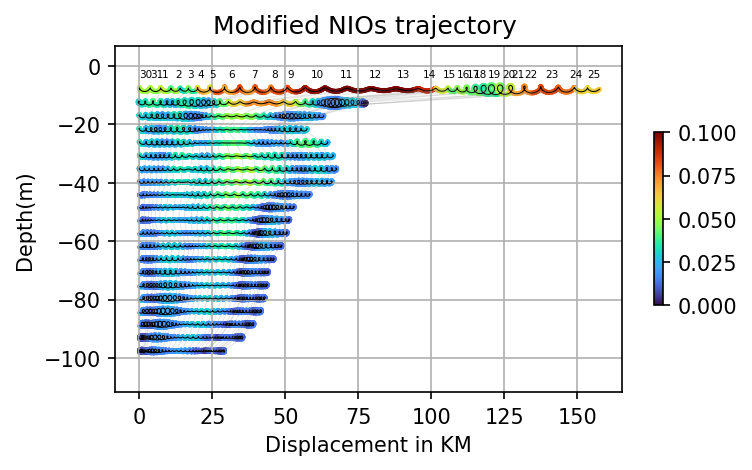

In [14]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150

xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)

speed = np.sqrt(data['utidal'].real**2 + data['vtidal'].imag**2)
for i in range(0,20):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

for i in range(20,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.colorbar(shrink = 0.5)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('Modified NIOs trajectory ')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)

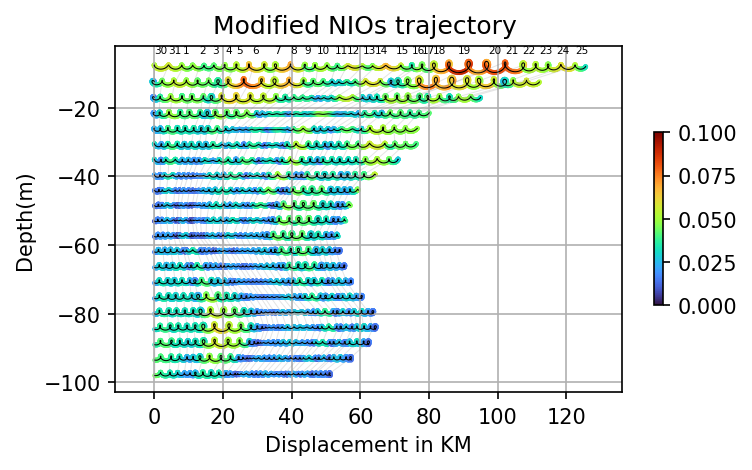

In [15]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150

xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)

speed = np.sqrt(data['u_baroclinic'].real**2 + data['v_baroclinic'].imag**2)
for i in range(0,20):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

for i in range(20,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (data['cvo_NIOSnegDATA'][:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (data['cvo_NIOSnegDATA'][:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.colorbar(shrink = 0.5)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('Modified NIOs trajectory ')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)

(np.float64(-6.333983011399402),
 np.float64(131.9264469493313),
 np.float64(-2.0021315459400753),
 np.float64(1.6815598059822405))

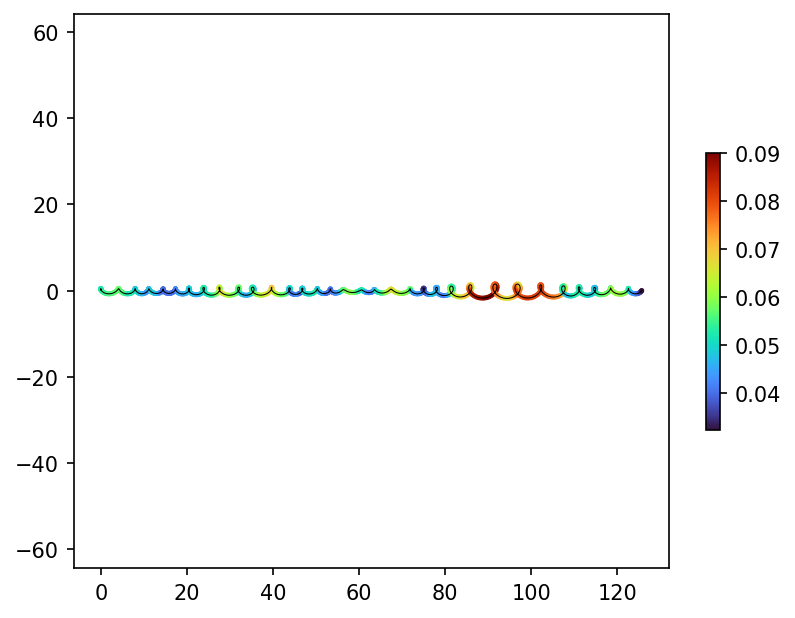

In [16]:
time_interval_min = 30
time_interval_sec = time_interval_min * 60
conversion_factor = time_interval_sec / 1000  # m/s → km per interval
u_km = (data['cvo_NIOSnegDATA'][:,20].real/1000 + (savgol_filter(speed[:,20]/1000,24*4,2))) * conversion_factor
v_km = (data['cvo_NIOSnegDATA'][:,20].imag/1000) * conversion_factor
x_traj = np.cumsum(u_km) 
y_traj = np.cumsum(v_km) 
plt.scatter(x_traj,y_traj, c = savgol_filter(speed[:,20]/1000,24*5,2), cmap='turbo', s=2)#, vmin = 0, vmax = 0.1)
plt.colorbar(shrink = 0.5)
plt.plot(x_traj,y_traj, linewidth = 0.5, color = 'k')
plt.axis('equal')

In [17]:
import warnings
warnings.filterwarnings('ignore')  #suppress some warnings about future code changes

import netCDF4 as nc
import xarray as xr    
import numpy as np
import datetime          #https://docs.python.org/3/library/datetime.html
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal as sg  #Package for signal analysis
import scipy.ndimage as si #Another package for signal analysis
from multitaper import MTSpec  #using German Prieto's multitaper package, https://github.com/gaprieto/multitaper
from scipy import fft as spfft
from scipy.fft import fft 
from scipy.stats import chi2
from scipy.special import digamma

In [18]:
import spectrum
import analytic_wavelet
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import signal, ndimage
from scipy import fft as spfft
from scipy.fft import fft 
import time

In [19]:
cvo_NIOSnegDATA = np.full((len(data['u_baroclinic'][:,1]), 21), np.nan + np.nan * 1j)  # Complex NaN
cvo_NIOSposDATA = np.full((len(data['u_baroclinic'][:,1]), 21), np.nan + np.nan * 1j)  # Complex NaN
cvo_NIOSDATA = np.full((len(data['u_baroclinic'][:,1]), 21), np.nan + np.nan * 1j)  # Complex NaN
cvr_NIOSDATA = np.full((len(data['u_baroclinic'][:,1]), 21), np.nan + np.nan * 1j)  # Complex NaN


for i in range(0, 21):
    dt = 0.5/24
    cv = data['u_baroclinic'][:,i] +1j*data['v_baroclinic'][:,i] 
    cv_centered = cv - np.mean(cv)
    f, p = signal.periodogram(cv_centered, fs=1/dt, return_onesided=False, axis=0)
    NW = 2
    Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cv_centered, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cv_centered))
    Sk = np.abs(Sk_complex)**2
    Sk = Sk.T
    p = np.mean(Sk*eigenvalues, axis=1) * dt
    
    #---------------------

    gamma = 3
    beta = 5
    omega=2*np.pi*33/len(cv_centered)
    morse = analytic_wavelet.GeneralizedMorseWavelet(gamma, beta)
    psi, psif = morse.make_wavelet(len(cv_centered), omega)
    #compute two bandpassed signals, one for the negative side and one for the positive side
    cvo_NIOSnegDATA[:,i] = analytic_wavelet.analytic_wavelet_transform(cv_centered, psif, False).flatten() #NEGATIVE BAND
    cvo_NIOSposDATA[:,i] = np.conj(analytic_wavelet.analytic_wavelet_transform(np.conj(cv_centered), psif, False)).flatten() #POSITIVE BAND
    cvo_NIOSDATA[:,i] = 1/np.sqrt(2)*(cvo_NIOSnegDATA[:,i] + cvo_NIOSposDATA[:,i])
    cvr_NIOSDATA[:,i] = cvo_NIOSDATA[:,i] - cv_centered
    del dt, cv, cv_centered, f, p, NW, Sk_complex, Sk, gamma, beta, omega, psi, psif

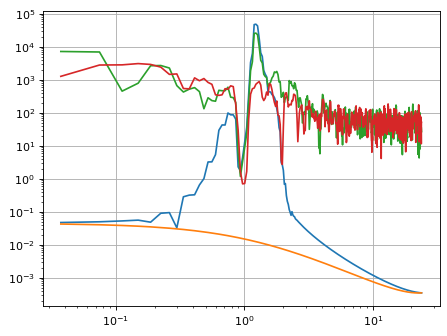

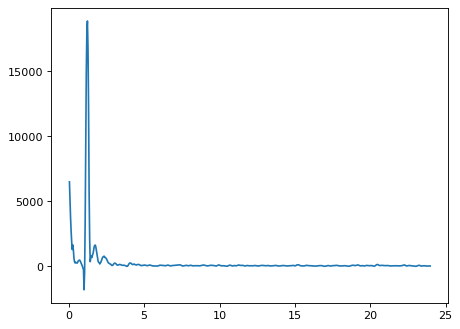

In [25]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 80

dt = (1/2)/24
cv = cvo_NIOSnegDATA[:,20].real +1j* cvo_NIOSnegDATA[:,20].imag
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
S = np.ravel(spec.spec)
f = np.ravel(spec.freq)
plt.loglog( f[f>0],S[f>0])#plot positive side
plt.loglog(-f[f<0],S[f<0])#plot negative side

#-----

#dt = (1/2)/24
#cv = data['u_baroclinic'][:,20] +1j* data['v_baroclinic'][:,20]
#P = 2
#spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
#S = np.ravel(spec.spec)
#f = np.ravel(spec.freq)
#plt.loglog( f[f>0],S[f>0])#plot positive side
#plt.loglog(-f[f<0],S[f<0])#plot negative side
#
#plt.grid()

#-------

#plt.figure()
#plt.plot(f[f>0],savgol_filter(S[f>0],10,2))#plot positive side

Text(1, 1, '-->Inertial Oscillation')

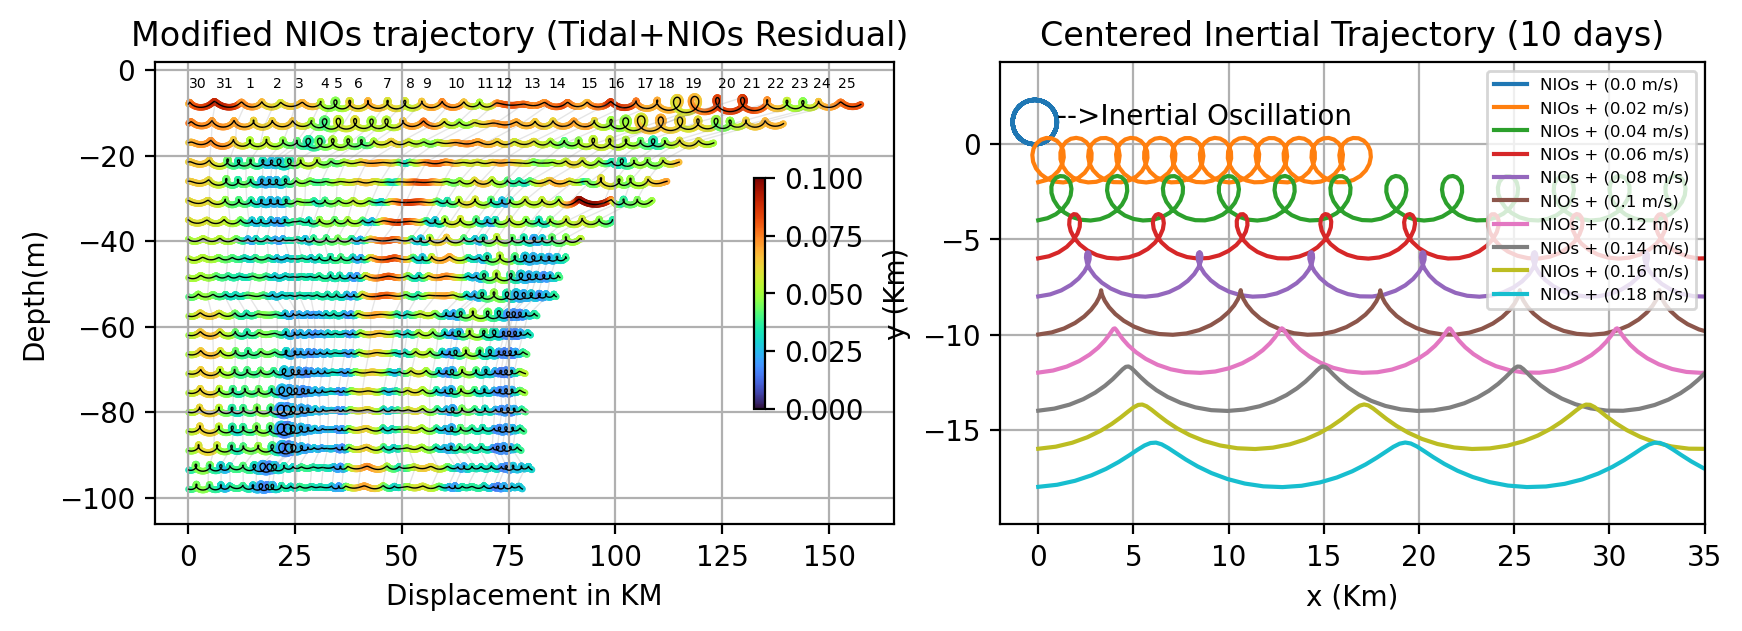

In [64]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 200

xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)

speed = np.sqrt(cvr_NIOSDATA.real**2 + cvr_NIOSDATA.imag**2)
for i in range(0,20):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATA[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATA[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

for i in range(20,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATA[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATA[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.colorbar(shrink = 0.5, pad = -0.2)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('Modified NIOs trajectory (Tidal+NIOs Residual) ')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)


#-----------------------------------------------------------------------

plt.subplot(1,2,2)

# Constants
latitude_deg = -36
latitude_rad = np.radians(latitude_deg)
Omega = 7.2921e-5  # Earth's rotation rate in rad/s
f = 2 * Omega * np.sin(latitude_rad)  # Coriolis parameter

# Simulation parameters
A = 0.1  # amplitude in m/s
duration_days = 10
dt_hours = 1  # time step in hours
dt = dt_hours * 3600  # time step in seconds

# Time array (in seconds)
t = np.arange(0, duration_days * 86400 + dt, dt)

# Velocity components (pure inertial oscillation)
u = A * np.cos(f * t)
v = A * np.sin(f * t)

# Integrate velocity to get displacement (x, y)
x = np.cumsum(u) * dt
y = np.cumsum(v) * dt

# Center the trajectory at (0, 0)
x_centered = x - np.mean(x)
y_centered = y - np.mean(y)

#-----------------------------
x_array = np.ones((241, 20)) * np.nan
y_array = np.ones((241, 20)) * np.nan
idx = np.arange(0, 0.21, 0.02)
for i in range(0, 10):
    # --- Add constant external velocity in x direction (0.1 m/s) ---
    u_drift = u + idx[i]  # add drift to u
    v_drift = v        # v unchanged
    # Integrate velocities with drift
    x_drift = np.cumsum(u_drift) * dt
    y_drift = np.cumsum(v_drift) * dt
    # Center drifted trajectory at starting point
    x_drift_centered = x_drift - x_drift[0]
    y_drift_centered = y_drift - y_drift[0]  
    x_array[:,i] = x_drift_centered/1000
    y_array[:,i] = -y_drift_centered/1000 -2*i
    plt.plot(x_drift_centered/1000, -y_drift_centered/1000 -2*i, label= f'NIOs + ({idx[i]} m/s)')


plt.xlabel('x (Km)')
plt.ylabel('y (Km)')
plt.title(f'Centered Inertial Trajectory ({duration_days} days)')
plt.grid(True)
plt.axis('equal')
plt.legend(loc="upper right", fontsize = 6)
plt.xlim([-2, 35])

plt.text(1,1,'-->Inertial Oscillation')
#for i in range(0, 240,24):
#    plt.plot(x_array[i,:], y_array[i,:], linewidth = 0.5, color = 'gray')

In [66]:
data['uS'].shape

(1287, 21)

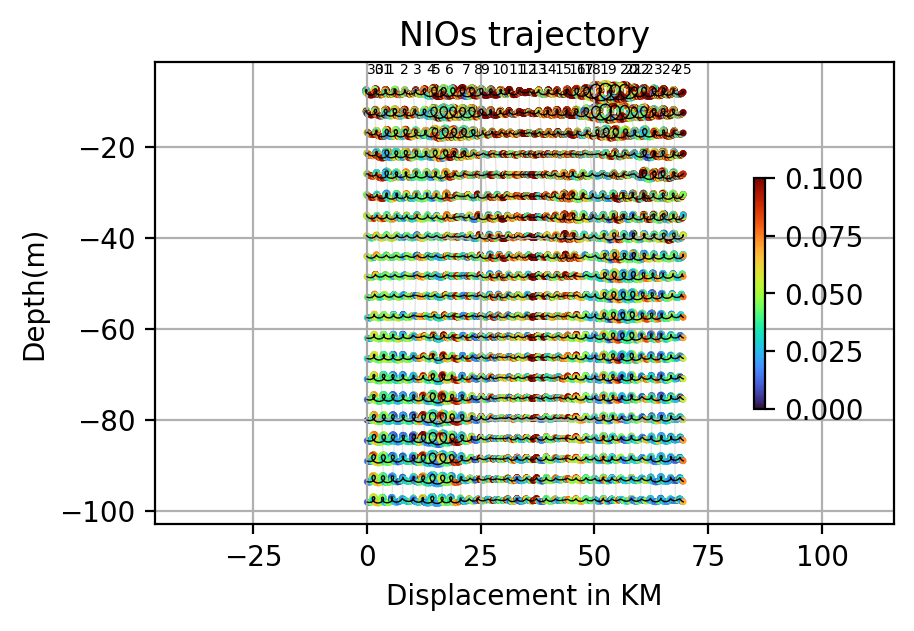

In [78]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 200

xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)

speed = np.full((1287, 21), 0.03*1000)
speed1 = np.sqrt(cvr_NIOSDATAX.real**2 + cvr_NIOSDATAX.imag**2)

for i in range(0,20):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATA[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATA[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = speed1[:,i]/1000, cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

for i in range(20,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATA[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATA[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = speed1[:,i]/1000, cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.colorbar(shrink = 0.5, pad = -0.2)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('NIOs trajectory')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)


In [28]:
cvo_NIOSnegDATAX = np.full((len(data['u_baroclinic'][:,1]), 21), np.nan + np.nan * 1j)  # Complex NaN
cvo_NIOSposDATAX = np.full((len(data['u_baroclinic'][:,1]), 21), np.nan + np.nan * 1j)  # Complex NaN
cvo_NIOSDATAX = np.full((len(data['u_baroclinic'][:,1]), 21), np.nan + np.nan * 1j)  # Complex NaN
cvr_NIOSDATAX = np.full((len(data['u_baroclinic'][:,1]), 21), np.nan + np.nan * 1j)  # Complex NaN


for i in range(0, 21):
    dt = 0.5/24
    cv = data['uS'][:,i] +1j*data['vS'][:,i] 
    cv_centered = cv - np.mean(cv)
    f, p = signal.periodogram(cv_centered, fs=1/dt, return_onesided=False, axis=0)
    NW = 2
    Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cv_centered, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cv_centered))
    Sk = np.abs(Sk_complex)**2
    Sk = Sk.T
    p = np.mean(Sk*eigenvalues, axis=1) * dt
    
    #---------------------

    gamma = 3
    beta = 30
    omega=2*np.pi*34/len(cv_centered)
    morse = analytic_wavelet.GeneralizedMorseWavelet(gamma, beta)
    psi, psif = morse.make_wavelet(len(cv_centered), omega)
    #compute two bandpassed signals, one for the negative side and one for the positive side
    cvo_NIOSnegDATAX[:,i] = analytic_wavelet.analytic_wavelet_transform(cv_centered, psif, False).flatten() #NEGATIVE BAND
    cvo_NIOSposDATAX[:,i] = np.conj(analytic_wavelet.analytic_wavelet_transform(np.conj(cv_centered), psif, False)).flatten() #POSITIVE BAND
    cvo_NIOSDATAX[:,i] = 1/np.sqrt(2)*(cvo_NIOSnegDATA[:,i] + cvo_NIOSposDATA[:,i])
    cvr_NIOSDATAX[:,i] = cvo_NIOSDATAX[:,i] - cv_centered
    del dt, cv, cv_centered, f, p, NW, Sk_complex, Sk, gamma, beta, omega, psi, psif

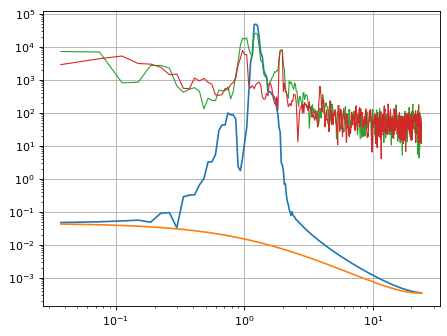

In [29]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 80
dt = (1/2)/24
cv = cvo_NIOSnegDATA[:,20].real +1j* cvo_NIOSnegDATA[:,20].imag
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
S = np.ravel(spec.spec)
f = np.ravel(spec.freq)
plt.loglog( f[f>0],S[f>0])#plot positive side
plt.loglog(-f[f<0],S[f<0])#plot negative side



dt = (1/2)/24
cv = data['uS'][:,20] +1j* data['vS'][:,20]
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
S = np.ravel(spec.spec)
f = np.ravel(spec.freq)
plt.loglog( f[f>0],S[f>0], linewidth = 1)#plot positive side
plt.loglog(-f[f<0],S[f<0], linewidth = 1)#plot negative side

plt.grid()

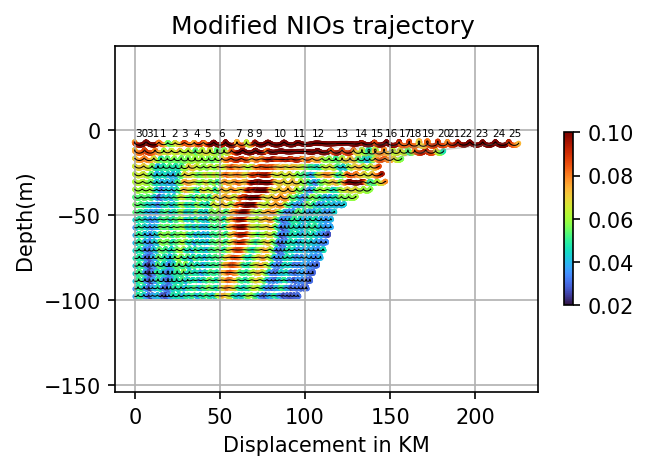

In [60]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150

xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)

speed = np.sqrt(cvr_NIOSDATAX.real**2 + cvr_NIOSDATAX.imag**2)
for i in range(0,20):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATAX[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATAX[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0.02, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

for i in range(20,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATAX[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATAX[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0.02, vmax = 0.1)
    plt.colorbar(shrink = 0.5)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('Modified NIOs trajectory ')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)

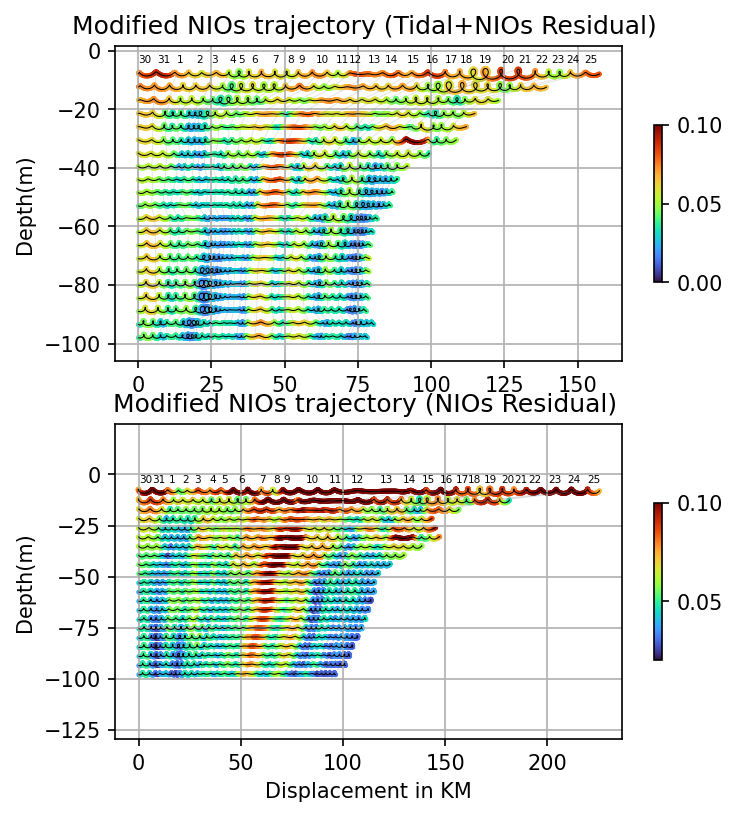

In [34]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150

xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)

speed = np.sqrt(cvr_NIOSDATA.real**2 + cvr_NIOSDATA.imag**2)
for i in range(0,20):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATA[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATA[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

for i in range(20,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATA[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATA[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0, vmax = 0.1)
    plt.colorbar(shrink = 0.5)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
#plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('Modified NIOs trajectory (Tidal+NIOs Residual) ')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)


#-------------------------------------------


xz = np.full((len(data['uS'][:,1]),21), np.nan)
yz = np.full((len(data['uS'][:,1]),21), np.nan)

plt.subplot(2,2,3)

speed = np.sqrt(cvr_NIOSDATAX.real**2 + cvr_NIOSDATAX.imag**2)
for i in range(0,20):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATAX[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATAX[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0.02, vmax = 0.1)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

for i in range(20,21):
    time_interval_min = 30
    time_interval_sec = time_interval_min * 60
    conversion_factor = time_interval_sec / 1000  # m/s → km per interval
    u_km = (cvo_NIOSnegDATAX[:,i].real/1000 + (savgol_filter(speed[:,i]/1000,24*4,2))) * conversion_factor
    v_km = (cvo_NIOSnegDATAX[:,i].imag/1000) * conversion_factor
    x_traj = np.cumsum(u_km) 
    y_traj = np.cumsum(v_km) 
    xz[:,i] = x_traj
    yz[:,i] = y_traj+4.5*i-98
    plt.scatter(x_traj,y_traj+4.5*i-98, c = savgol_filter(speed[:,i]/1000,24*5,2), cmap='turbo', s=2, vmin = 0.02, vmax = 0.1)
    plt.colorbar(shrink = 0.5)
    plt.plot(x_traj,y_traj+4.5*i-98, linewidth = 0.5, color = 'k')

plt.axis('equal')
plt.xlabel('Displacement in KM')
plt.ylabel('Depth(m)')
plt.title('Modified NIOs trajectory (NIOs Residual) ')
plt.grid()

for i in range(0, 1290,24*2):
    plt.plot(xz[i,:],yz[i,:], linewidth = 0.5, color = 'grey', alpha = 0.2)

for i in range(0, 1290,24*2):
    plt.text(xz[i,20], -4, data['time']['day'][i], fontsize = 5)

In [55]:
from multitaper import MTSpec

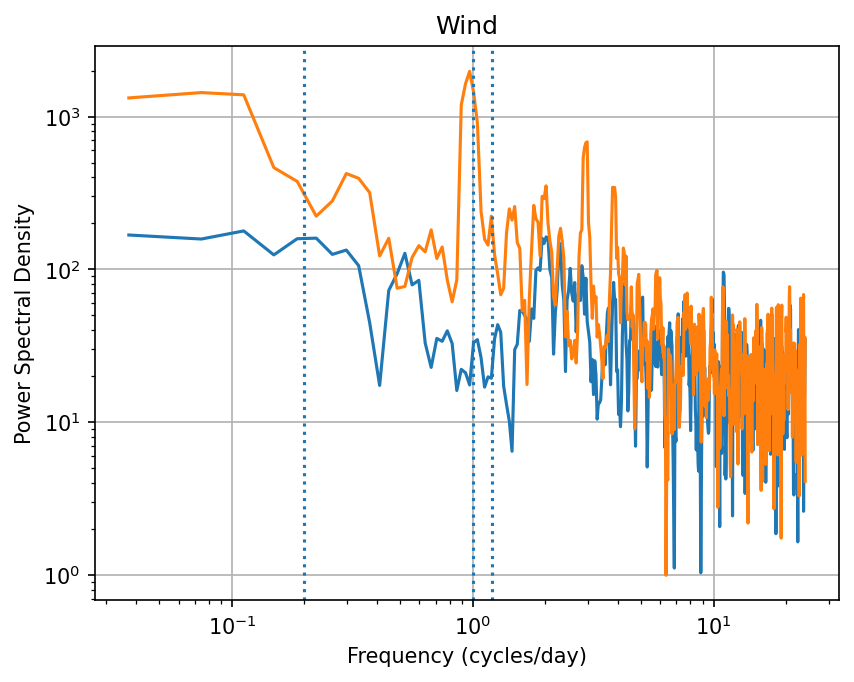

In [63]:
speed1 = np.sqrt(cvr_NIOSDATA.real**2 + cvr_NIOSDATA.imag**2)
speed2 = np.sqrt(cvr_NIOSDATAX.real**2 + cvr_NIOSDATAX.imag**2)
dt = (0.5)/24
cv = speed1[:,20]
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
S = np.ravel(spec.spec)
f = np.ravel(spec.freq)
plt.loglog( f[f>0],S[f>0])#plot positive side

cv = speed2[:,20]
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
S = np.ravel(spec.spec)
f = np.ravel(spec.freq)
plt.loglog( f[f>0],S[f>0])#plot positive side

plt.axvline(24/24, linestyle = ':')
plt.axvline(24/20, linestyle = ':')
plt.axvline(24/(24*5), linestyle = ':')
plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency (cycles/day)')
plt.title('Wind')
del cv, P, spec, S, f, dt
plt.grid()